# Ordinary Least Squares

最小化数据集中观察到的目标与线性近似预测的目标之间的残差平方和

LinearRegression将在其`fit`方法中接收向量`x`,`y`,并将线性模型的系数`w`存储在其`coef_`成员中


In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) #x,y
print(reg.coef_) #coefficients
# Output: array([0.5, 0.5])
#reg.intercept_ #intercept
print(reg.intercept_) # w_0
# Output: 0.0
print(reg.predict([[1, 1]])) #predict
# Output: array([1.])
#reg.score 是用来评估模型性能的，返回的是 ( R^2 ) 决定系数，值越接近 1.0，说明模型的拟合效果越好。
print(reg.score([[0, 0], [1, 1], [2, 2]], [0, 1, 2])) #score，R^2,
# Output: 1.0

[0.5 0.5]
1.1102230246251565e-16
[1.]
1.0


# Ordinary Least Squares Example
This example shows how to use the ordinary least squares (OLS) model called `LinearRegression` in scikit-learn.

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# 加载糖尿病数据集
# 将数据和目标分成训练集和测试集
X, y = load_diabetes(return_X_y=True)
print(X.shape, y.shape) 
X = X[:,[2]] # 只取第3列特征
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20,shuffle=False)


(442, 10) (442,)


In [25]:
from sklearn.linear_model import LinearRegression
# 创建线性回归模型
regressor = LinearRegression().fit(X_train, y_train) # 训练模型

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test) # 预测
# 计算均方误差和决定系数

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
R^2: 0.47


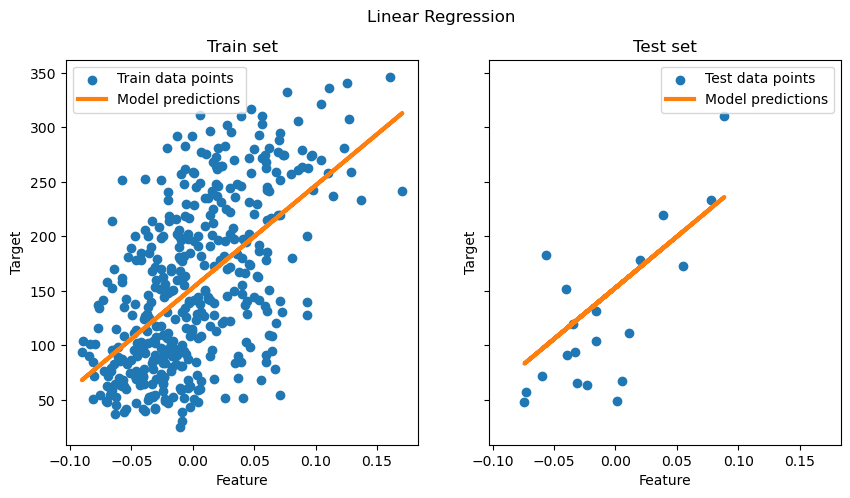

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label = "Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)

ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label = "Test data points")
ax[1].plot(
    X_test,
    y_pred,
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()
# 线性回归模型的可视化